Converged at 45752/100000
tensor(0.0975, grad_fn=<AddBackward0>)
Converged at 49242/100000
tensor(1.0000, grad_fn=<AddBackward0>)
Converged at 48434/100000
tensor(0.5488, grad_fn=<AddBackward0>)
Converged at 44746/100000
tensor(0.0975, grad_fn=<AddBackward0>)
Converged at 43531/100000
tensor(0.0975, grad_fn=<AddBackward0>)
Converged at 50112/100000
tensor(0.0975, grad_fn=<AddBackward0>)
Converged at 69515/100000
tensor(0.0976, grad_fn=<AddBackward0>)
Converged at 44754/100000
tensor(0.0975, grad_fn=<AddBackward0>)
Converged at 50069/100000
tensor(0.5488, grad_fn=<AddBackward0>)
Converged at 50575/100000
tensor(0.0975, grad_fn=<AddBackward0>)
Converged at 44771/100000
tensor(0.0975, grad_fn=<AddBackward0>)
Converged at 44232/100000
tensor(0.0975, grad_fn=<AddBackward0>)
Converged at 46341/100000
tensor(0.5488, grad_fn=<AddBackward0>)
Converged at 27169/100000
tensor(0.0975, grad_fn=<AddBackward0>)
Converged at 49223/100000
tensor(0.0975, grad_fn=<AddBackward0>)
Converged at 47829/100000

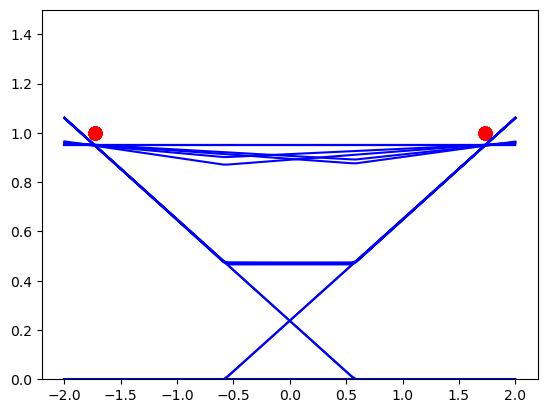

In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np


torch.manual_seed(0)

num_experiments = 20

x = torch.tensor([[-np.sqrt(3)],[np.sqrt(3)]], dtype = torch.float32)
y = torch.tensor([[1],[1]], dtype = torch.float32)

for i in range(num_experiments):
    
    m = 3

    model = nn.Sequential(
                nn.Linear(1, m, bias = True, dtype = torch.float32),
                nn.ReLU(),
                nn.Linear(m, 1, bias = False, dtype = torch.float32)
            )

    optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
    epochs = 100000
    tol = 1e-6
    lam = 1e-1

    for i in range(epochs):

        model.zero_grad()
        l2_penalty = sum([torch.sum(param ** 2) for param in model.parameters()])
        obj = torch.sum((model(x) - y) ** 2) / 2 + lam * l2_penalty/2
        obj.backward()
            
        optimizer.step()

        # check for convergence
        
        model.zero_grad()
        l2_penalty = sum([torch.sum(param ** 2) for param in model.parameters()])
        obj = torch.sum((model(x) - y) ** 2) / 2 + lam * l2_penalty/2
        obj.backward()    
        grad_norm = sum([torch.sum(param.grad ** 2) for param in model.parameters()])

        if grad_norm <= tol:
            print(f"Converged at {i}/{epochs}")
            print(obj)
            break

        #if i % 25 == 0:
        #    print(f"{i}/{epochs}: Obj - {obj}, Grad - {grad_norm}")


    xs = np.linspace(-2, 2, 100).T
    xs = np.expand_dims(xs, axis = 1)
    plt.plot(xs, model(torch.tensor(xs, dtype = torch.float32)).detach().numpy(), color = 'blue')
    plt.scatter(np.sqrt(3), 1, color = 'red', s = 80)
    plt.scatter(-np.sqrt(3), 1, color = 'red', s = 80)
    plt.ylim(0,1.5)

0/100000: Obj - 5514.25146484375, Grad - 64729.25
2500/100000: Obj - 21.856008529663086, Grad - 0.008170856162905693
5000/100000: Obj - 21.83997917175293, Grad - 0.004937305115163326
7500/100000: Obj - 21.830265045166016, Grad - 0.0029877114575356245
10000/100000: Obj - 21.824382781982422, Grad - 0.001809635665267706
12500/100000: Obj - 21.820819854736328, Grad - 0.0010966826230287552
15000/100000: Obj - 21.81867218017578, Grad - 0.0006648866110481322
17500/100000: Obj - 21.817359924316406, Grad - 0.0004031744902022183
20000/100000: Obj - 21.81656837463379, Grad - 0.0002445192658342421
22500/100000: Obj - 21.81608772277832, Grad - 0.0001483163796365261
25000/100000: Obj - 21.815814971923828, Grad - 9.001840953715146e-05
27500/100000: Obj - 21.815629959106445, Grad - 5.46294468222186e-05
Converged at 27946/100000
tensor(21.8156, grad_fn=<AddBackward0>)
0/100000: Obj - 5401.3896484375, Grad - 136977.703125
2500/100000: Obj - 6.01746940612793, Grad - 0.010110853239893913
5000/100000: Obj 

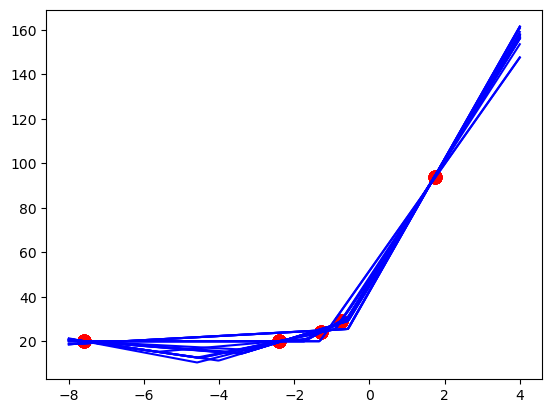

In [2]:
import matplotlib.pyplot as plt

x = torch.tensor([[np.tan(np.pi/3)],[-np.tan(5*np.pi/24)],[-np.tan(7*np.pi/24)],[-np.tan(9*np.pi/24)],[-np.tan(11*np.pi/24)]], dtype = torch.float32)
y = torch.tensor([[94],[29],[24],[20],[20]], dtype = torch.float32)

for i in range(num_experiments):
    
    m = 6

    model = nn.Sequential(
                nn.Linear(1, m, bias = True, dtype = torch.float32),
                nn.ReLU(),
                nn.Linear(m, 1, bias = False, dtype = torch.float32)
            )

    optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
    epochs = 100000
    tol = 5e-5
    lam = 1e-1

    for i in range(epochs):

        model.zero_grad()
        l2_penalty = sum([torch.sum(param ** 2) for param in model.parameters()])
        obj = torch.sum((model(x) - y) ** 2) / 2 + lam * l2_penalty/2
        obj.backward()
            
        optimizer.step()

        # check for convergence
        
        model.zero_grad()
        l2_penalty = sum([torch.sum(param ** 2) for param in model.parameters()])
        obj = torch.sum((model(x) - y) ** 2) / 2 + lam * l2_penalty/2
        obj.backward()    
        grad_norm = sum([torch.sum(param.grad ** 2) for param in model.parameters()])

        if grad_norm <= tol:
            print(f"Converged at {i}/{epochs}")
            print(obj)
            break

        if i % 2500 == 0:
            print(f"{i}/{epochs}: Obj - {obj}, Grad - {grad_norm}")


    xs = np.linspace(-8, 4, 300).T
    xs = np.expand_dims(xs, axis = 1)
    plt.plot(xs, model(torch.tensor(xs, dtype = torch.float32)).detach().numpy(), color = 'blue')
    for p in range(5):
        plt.scatter(x[p], y[p], color = 'red', s = 80)

Converged at 49979/100000
tensor(0.5488, grad_fn=<AddBackward0>)
Converged at 49372/100000
tensor(0.0975, grad_fn=<AddBackward0>)
Converged at 50480/100000
tensor(0.0975, grad_fn=<AddBackward0>)
Converged at 49990/100000
tensor(0.0975, grad_fn=<AddBackward0>)
Converged at 50728/100000
tensor(0.0975, grad_fn=<AddBackward0>)
Converged at 49786/100000
tensor(0.5488, grad_fn=<AddBackward0>)
Converged at 50223/100000
tensor(0.0975, grad_fn=<AddBackward0>)
Converged at 45900/100000
tensor(0.0975, grad_fn=<AddBackward0>)
Converged at 45961/100000
tensor(0.0975, grad_fn=<AddBackward0>)
Converged at 50334/100000
tensor(0.0975, grad_fn=<AddBackward0>)
Converged at 51734/100000
tensor(0.5488, grad_fn=<AddBackward0>)
Converged at 48257/100000
tensor(0.0975, grad_fn=<AddBackward0>)
Converged at 48093/100000
tensor(0.0975, grad_fn=<AddBackward0>)
Converged at 48116/100000
tensor(0.0975, grad_fn=<AddBackward0>)
Converged at 46513/100000
tensor(0.0975, grad_fn=<AddBackward0>)
Converged at 49838/100000

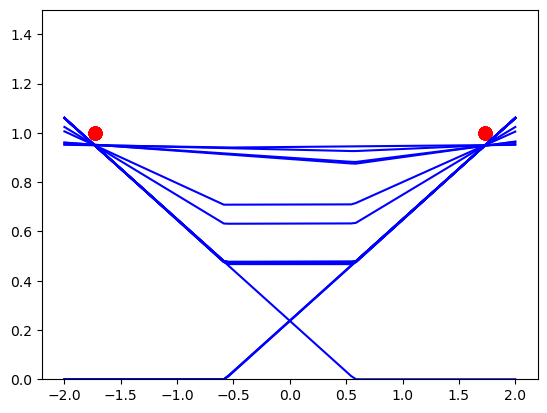

In [3]:
x = torch.tensor([[-np.sqrt(3)],[np.sqrt(3)]], dtype = torch.float32)
y = torch.tensor([[1],[1]], dtype = torch.float32)

for i in range(num_experiments):
    
    m = 5

    model = nn.Sequential(
                nn.Linear(1, m, bias = True, dtype = torch.float32),
                nn.ReLU(),
                nn.Linear(m, 1, bias = False, dtype = torch.float32)
            )

    optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
    epochs = 100000
    tol = 1e-6
    lam = 1e-1

    for i in range(epochs):

        model.zero_grad()
        l2_penalty = sum([torch.sum(param ** 2) for param in model.parameters()])
        obj = torch.sum((model(x) - y) ** 2) / 2 + lam * l2_penalty/2
        obj.backward()
            
        optimizer.step()

        # check for convergence
        
        model.zero_grad()
        l2_penalty = sum([torch.sum(param ** 2) for param in model.parameters()])
        obj = torch.sum((model(x) - y) ** 2) / 2 + lam * l2_penalty/2
        obj.backward()    
        grad_norm = sum([torch.sum(param.grad ** 2) for param in model.parameters()])

        if grad_norm <= tol:
            print(f"Converged at {i}/{epochs}")
            print(obj)
            break

        #if i % 25 == 0:
        #    print(f"{i}/{epochs}: Obj - {obj}, Grad - {grad_norm}")


    xs = np.linspace(-2, 2, 100).T
    xs = np.expand_dims(xs, axis = 1)
    plt.plot(xs, model(torch.tensor(xs, dtype = torch.float32)).detach().numpy(), color = 'blue')
    plt.scatter(np.sqrt(3), 1, color = 'red', s = 80)
    plt.scatter(-np.sqrt(3), 1, color = 'red', s = 80)
    plt.ylim(0,1.5)

0/100000: Obj - 5362.2021484375, Grad - 95953.328125
2500/100000: Obj - 6.107309818267822, Grad - 0.07274934649467468
5000/100000: Obj - 6.053719520568848, Grad - 0.0165568757802248
7500/100000: Obj - 6.020477771759033, Grad - 0.010513843968510628
10000/100000: Obj - 5.9992852210998535, Grad - 0.0067342487163841724
12500/100000: Obj - 5.985641002655029, Grad - 0.004364975728094578
15000/100000: Obj - 5.9767351150512695, Grad - 0.0028758046682924032
17500/100000: Obj - 5.970809459686279, Grad - 0.0019354135729372501
20000/100000: Obj - 5.966774940490723, Grad - 0.0013376367278397083
22500/100000: Obj - 5.96394681930542, Grad - 0.0009538943413645029
25000/100000: Obj - 5.961896896362305, Grad - 0.0007042493089102209
27500/100000: Obj - 5.960357189178467, Grad - 0.000538953929208219
30000/100000: Obj - 5.9591593742370605, Grad - 0.00042707170359790325
32500/100000: Obj - 5.958194732666016, Grad - 0.0003492463147267699
35000/100000: Obj - 5.957396030426025, Grad - 0.00029361568158492446
37

Text(0, 0.5, '$f(x)$')

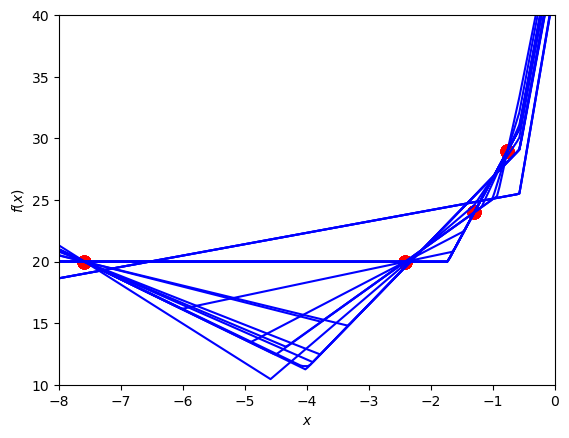

In [4]:
import matplotlib.pyplot as plt

x = torch.tensor([[np.tan(np.pi/3)],[-np.tan(5*np.pi/24)],[-np.tan(7*np.pi/24)],[-np.tan(9*np.pi/24)],[-np.tan(11*np.pi/24)]], dtype = torch.float32)
y = torch.tensor([[94],[29],[24],[20],[20]], dtype = torch.float32)

for i in range(num_experiments):
    
    m = 10

    model = nn.Sequential(
                nn.Linear(1, m, bias = True, dtype = torch.float32),
                nn.ReLU(),
                nn.Linear(m, 1, bias = False, dtype = torch.float32)
            )

    optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
    epochs = 100000
    tol = 5e-5
    lam = 1e-1

    for i in range(epochs):

        model.zero_grad()
        l2_penalty = sum([torch.sum(param ** 2) for param in model.parameters()])
        obj = torch.sum((model(x) - y) ** 2) / 2 + lam * l2_penalty/2
        obj.backward()
            
        optimizer.step()

        # check for convergence
        
        model.zero_grad()
        l2_penalty = sum([torch.sum(param ** 2) for param in model.parameters()])
        obj = torch.sum((model(x) - y) ** 2) / 2 + lam * l2_penalty/2
        obj.backward()    
        grad_norm = sum([torch.sum(param.grad ** 2) for param in model.parameters()])

        if grad_norm <= tol:
            print(f"Converged at {i}/{epochs}")
            print(obj)
            break

        if i % 2500 == 0:
            print(f"{i}/{epochs}: Obj - {obj}, Grad - {grad_norm}")


    xs = np.linspace(-8, 4, 300).T
    xs = np.expand_dims(xs, axis = 1)
    plt.plot(xs, model(torch.tensor(xs, dtype = torch.float32)).detach().numpy(), color = 'blue')
    for p in range(5):
        plt.scatter(x[p], y[p], color = 'red', s = 80)

plt.xlim(-8, 0)
plt.ylim(10, 40)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")